# Pandas Basics


In [1]:
import numpy as np
import pandas as pd

## 1. Intro to Data Structures
### 1.1 Sereies
`Series` is a **one-dimensional labeled array** capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. 
#### 1.1.1 Object Creation
The basic method to create a Series is to call: 
``` 
s = pd.Series(data=data, index=index)
```

In [2]:
s = pd.Series(data=[1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


**Creation from ndarray**

If data is an ndarray, `index` must be the same length as `data`. If no index is passed, one will be created having values `[0, ..., len(data) - 1]`.

In [3]:
s = pd.Series(data=np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s.index)

a    0
b    1
c    2
d    3
e    4
dtype: int32
Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


**Creation from dict**

If an `index` is passed, the values in data corresponding to the labels in the `index` will be pulled out. The `dtype` is the same as that of the dict

In [4]:
d = {'a' : 0, 'b' : 1, 'c' : 2, 'd' : 3}
s = pd.Series(data=d)
print(s)
s = pd.Series(data=d, index=['a', 'c'])
print(s)

a    0
b    1
c    2
d    3
dtype: int64
a    0
c    2
dtype: int64


**Creation from Scalar Value**

If data is a scalar value, an `index` must be provided. The value will be repeated to match the length of `index`. The `dtype` is the same as that of the scalar

In [5]:
s = pd.Series(data='name', index=[e for e in range(5)])
print(s)

0    name
1    name
2    name
3    name
4    name
dtype: object


#### 1.1.2 Series is ndarray-like and dict-like
Series acts very similarly to a `ndarray` and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.

In [6]:
s = pd.Series(data=np.arange(5), index=['a', 'b', 'c', 'd', 'e'])
print(s)
print(s[1:3])
print(s[[4, 3, 1]])
print(s[s > s.median()])
print(np.exp(s))

a    0
b    1
c    2
d    3
e    4
dtype: int32
b    1
c    2
dtype: int32
e    4
d    3
b    1
dtype: int32
d    3
e    4
dtype: int32
a     1.000000
b     2.718282
c     7.389056
d    20.085537
e    54.598150
dtype: float64


While Series is ndarray-like, if you need an actual ndarray, then use `Series.to_numpy()`.

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels. The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing `NaN`.

In [7]:
print(s[1:])
print(s[:-1])
print(s[1:] + s[:-1])

b    1
c    2
d    3
e    4
dtype: int32
a    0
b    1
c    2
d    3
dtype: int32
a    NaN
b    2.0
c    4.0
d    6.0
e    NaN
dtype: float64


A Series is also like a fixed-size dict in that you can get and set values by index label:

In [8]:
print(s['a'])
s['e'] = 6
print(s)
print('a' in s)
print('g' in s)

0
a    0
b    1
c    2
d    3
e    6
dtype: int32
True
False


If a label is not contained in the index, an exception is raised. Using the `Series.get()` method, a missing label will return None or specified default.

In [9]:
print(s.get('g', default=np.nan))

nan


#### 1.1.3 Name attribute
The Series name can be assigned automatically in many cases, in particular, when selecting a single column from a DataFrame, the name will be assigned the column label.

You can rename a Series with the `Series.rename()` method. Note that this function returns a new object

In [10]:
s = pd.Series(np.random.randn(5), name='example')
print(s)
s = s.rename('new name')
print(s.name)

0    0.589740
1    0.403182
2   -0.512509
3   -1.339749
4   -1.704309
Name: example, dtype: float64
new name


### 1.2 DataFrame
`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of `Series` objects. 
#### 1.2.1 Object Creation
**Creation from dict of Series / ndarray / list** - column by column, add index at last

In [11]:
d = {
    'feature1' : pd.Series([1.0, 2.0, 3.0], index=['a', 'b', 'c']),
    'feature2' : pd.Series([1.0, 2.0, 3.0, 4.0], index=['a', 'b', 'c', 'd']),
}
df = pd.DataFrame(data=d)
print(df)
print(df.index)
print(df.columns)

   feature1  feature2
a       1.0       1.0
b       2.0       2.0
c       3.0       3.0
d       NaN       4.0
Index(['a', 'b', 'c', 'd'], dtype='object')
Index(['feature1', 'feature2'], dtype='object')


All ndarrays must share the same length. If an index is passed, it must also be the same length as the arrays. If no index is passed, the result will be `range(n)`, where `n` is the array length.

In [12]:
d = {
    'feature1' : [1.0, 2.0, 3.0, 4.0],
    'feature2' : [4.0, 3.0, 2.0, 1.0]
}
df = pd.DataFrame(data=d)
print(df)
df = pd.DataFrame(data=d, index=['row1', 'row2', 'row3', 'row4'])
print(df)

   feature1  feature2
0       1.0       4.0
1       2.0       3.0
2       3.0       2.0
3       4.0       1.0
      feature1  feature2
row1       1.0       4.0
row2       2.0       3.0
row3       3.0       2.0
row4       4.0       1.0


**Creation from a list of dicts / namedtuples / dataclasses** - row by row, add index at last

In [13]:
l = [
    {'a' : 1, 'b' : 2},
    {'a' : 5, 'b' : 10, 'c' : 20}
]
df = pd.DataFrame(data=l)
print(df)
df = pd.DataFrame(data=l, index=['row1', 'row2'])
print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0
      a   b     c
row1  1   2   NaN
row2  5  10  20.0


In [14]:
from collections import namedtuple
Point = namedtuple(typename='Point', field_names='x y')
l = [Point(0, 0), Point(0, 3), Point(2, 3)]
df = pd.DataFrame(data=l, index=['point1', 'point2', 'point3'])
print(df)

        x  y
point1  0  0
point2  0  3
point3  2  3


In [15]:
from dataclasses import make_dataclass
Point_3D = make_dataclass(cls_name='Point_3D', fields=[('x', int), ('y', int), ('z', int)])
l = [Point_3D(0, 0, 0), Point_3D(0, 3, 5), Point_3D(2, 3, 1)]
df = pd.DataFrame(data=l)
print(df)

   x  y  z
0  0  0  0
1  0  3  5
2  2  3  1


**Creation by `DataFrame.from_dict()`**

It operates like the DataFrame constructor except for the orient parameter which is 'columns' by default, but which can be set to 'index' in order to use the dict keys as row labels.

In [16]:
d = {
    'a' : [1, 2, 3],
    'b' : [4, 5, 6]
}
df = pd.DataFrame.from_dict(data=d, orient='columns') # default
print(df)
df = pd.DataFrame.from_dict(data=d, orient='index')
print(df)

   a  b
0  1  4
1  2  5
2  3  6
   0  1  2
a  1  2  3
b  4  5  6


![](./src/img/001.png)

#### 1.2.2 Basic Column Operations

In [17]:
l = [{'x' : 0, 'y' : 0}, {'x' : 2 , 'y' : 1}, {'x' : 1, 'y' : 5}]
df = pd.DataFrame(data=l, index=['point1', 'point2', 'point3'])
print(df)
print(df['x']) # selection
df['z'] = df['x'] + df['y'] # Series addition & insertion
print(df)
df['flag'] = df['z'] > 2
print(df)
df['xxx'] = 0 # scalar insertion
print(df)
del df['xxx'] # deletion
print(df)
featureFlag = df.pop('flag') # pop feature Series
print(df)
print(featureFlag)

        x  y
point1  0  0
point2  2  1
point3  1  5
point1    0
point2    2
point3    1
Name: x, dtype: int64
        x  y  z
point1  0  0  0
point2  2  1  3
point3  1  5  6
        x  y  z   flag
point1  0  0  0  False
point2  2  1  3   True
point3  1  5  6   True
        x  y  z   flag  xxx
point1  0  0  0  False    0
point2  2  1  3   True    0
point3  1  5  6   True    0
        x  y  z   flag
point1  0  0  0  False
point2  2  1  3   True
point3  1  5  6   True
        x  y  z
point1  0  0  0
point2  2  1  3
point3  1  5  6
point1    False
point2     True
point3     True
Name: flag, dtype: bool


When inserting a `Series` that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index.

By default, columns get inserted at the end. `DataFrame.insert()` inserts at a particular location in the columns.

In [18]:
df['xxx'] = pd.Series({'point1' : 1, 'point2' : 2})
print(df)
df.insert(loc=1, column='yyy', value=pd.Series(data=[1, 2, 3], index=df.index))
print(df)

        x  y  z  xxx
point1  0  0  0  1.0
point2  2  1  3  2.0
point3  1  5  6  NaN
        x  yyy  y  z  xxx
point1  0    1  0  0  1.0
point2  2    2  1  3  2.0
point3  1    3  5  6  NaN


**Assigning new columns in method chains**

`DataFrame` has an `assign()` method that allows you to easily create new columns that are potentially derived from existing columns.

Note that this function always returns a copy of the data, leaving the original DataFrame untouched.

In [19]:
iris = pd.read_csv('data/iris.data')
print(iris.head())
iris_2 = iris.assign(sepal_ratio=iris['SepalWidth'] / iris['SepalLength'])
print(iris_2.head())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name  sepal_ratio
0          5.1         3.5          1.4         0.2  Iris-setosa     0.686275
1          4.9         3.0          1.4         0.2  Iris-setosa     0.612245
2          4.7         3.2          1.3         0.2  Iris-setosa     0.680851
3          4.6         3.1          1.5         0.2  Iris-setosa     0.673913
4          5.0         3.6          1.4         0.2  Iris-setosa     0.720000


<Axes: xlabel='SepalRatio', ylabel='PetalRatio'>

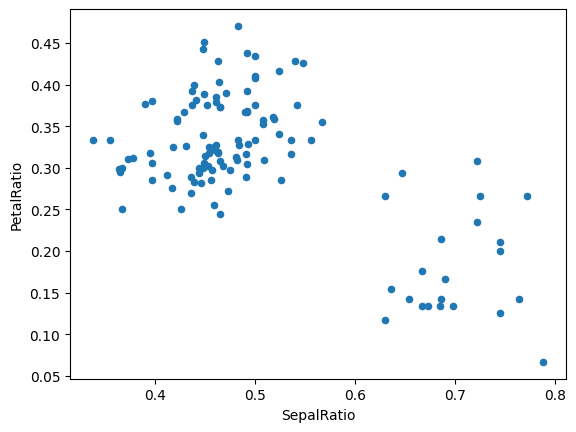

In [20]:
iris.query('SepalLength > 5').assign(
    SepalRatio=lambda x : x.SepalWidth / x.SepalLength,
    PetalRatio=lambda x : x.PetalWidth / x.PetalLength,
).plot(kind='scatter', x='SepalRatio', y='PetalRatio')

#### 1.2.3 Basic Row Operations
**Indexing and selection**

`.loc[]` is primarily label based, but may also be used with a boolean array. `KeyError` will be raised when the items are not found. Allowed inputs are:
- A single label, e.g. `df.loc[5]` or `df.loc['a']` (note that 5 is interpreted as a label, not an integer position).
- A list or array of labels, e.g. `df.loc[['a', 'b', 'c']]`.
- A slice object with labels, e.g. `df.loc['a':'f']` (note that start and the stop are both included!).
- A boolean array, e.g. `df.loc[[True, False, False, True]]`.
- A callable function with one argument and that returns valid output for indexing (one of the above).
- A tuple of row (and column) indices whose elements are one of the above inputs.

`.iloc[]` is primarily integer position based, but may also be used with a boolean array. Allowed inputs are similar to that above.

In [21]:
df = pd.DataFrame({
    'a' : [1, 2, 3, 4],
    'b' : [5, 6, 7, 8],
}, index=['row1', 'row2', 'row3', 'row4'])
print(df)
# select row by label
print(df.loc['row2']) 
# select row by integer location
print(df.iloc[2]) 
# slice rows
print(df[1:3]) 
# select rows by boolean vector
print(df[[True, False, False, True]])

      a  b
row1  1  5
row2  2  6
row3  3  7
row4  4  8
a    2
b    6
Name: row2, dtype: int64
a    3
b    7
Name: row3, dtype: int64
      a  b
row2  2  6
row3  3  7
      a  b
row1  1  5
row4  4  8


**Data alignment and arithmetic**

Data alignment between DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [22]:
df1 = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
print(df1 + df2)

          A         B         C   D
0 -0.174138  0.420312 -0.405069 NaN
1 -3.996077 -1.494883 -0.076563 NaN
2  2.018239 -1.101472 -1.556562 NaN
3 -1.159936 -2.758258  0.955675 NaN
4 -1.644866 -0.133045 -1.371091 NaN
5  0.949457  0.820472  1.379973 NaN
6  0.615635 -0.282101 -0.398174 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus **broadcasting row-wise**. 

In [23]:
print(df1 - df1.iloc[0])

          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1 -1.129187 -1.506107  2.910101  2.297255
2  2.621786 -0.253481  0.285668  0.492198
3 -0.015349 -3.421815  1.946841  2.315705
4 -1.323214 -0.265518  1.246812  2.210746
5  1.676143  1.316888  3.073187  0.497691
6  0.065024 -2.041205  1.001616  1.761696
7  0.858012  0.013783  0.645013  1.334758
8  0.910952 -0.439021 -0.815183  0.736534
9 -0.105546 -1.514933  1.027157  1.353214


Arithmetic operations with scalars operate element-wise. Boolean operators operate element-wise as well.

#### 1.2.4 Transposing
To transpose, access the `T` attribute or `DataFrame.transpose()`, similar to an `ndarray`:

In [24]:
print(df[:5].T)

   row1  row2  row3  row4
a     1     2     3     4
b     5     6     7     8


#### 1.2.5 DataFrame interoperability with NumPy functions
Most NumPy functions can be called directly on `Series` and `DataFrame`.

In [25]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D'])
print(df)
print(np.exp(df))
print(np.asarray(df))

          A         B         C         D
0  0.737454 -1.655354  0.091289 -0.301453
1 -0.950563  1.141927 -0.189950 -1.933659
2 -0.948693 -0.785489  0.904812  0.293918
3  0.487861 -0.232455 -0.902498  1.490401
4  0.739368 -0.342658  0.664331 -0.613484
5  1.897567  1.395417  2.677618  0.519177
6 -1.626630  0.367716 -0.557532 -0.879213
7 -1.485970  0.467882 -0.330232  1.252988
8  0.235787  0.132291  0.358204 -0.381554
9 -0.103886 -1.235147 -0.516849 -2.181342
          A         B          C         D
0  2.090606  0.191024   1.095586  0.739742
1  0.386523  3.132801   0.827000  0.144618
2  0.387247  0.455896   2.471468  1.341674
3  1.628829  0.792586   0.405555  4.438874
4  2.094610  0.709881   1.943190  0.541461
5  6.669650  4.036657  14.550397  1.680644
6  0.196591  1.444431   0.572620  0.415110
7  0.226283  1.596609   0.718757  3.500789
8  1.265905  1.141441   1.430757  0.682799
9  0.901328  0.290792   0.596397  0.112890
[[ 0.73745394 -1.65535433  0.09128911 -0.30145319]
 [-0.95056329 

#### 1.2.6 Console Display

In [26]:
iris = pd.read_csv('./data/iris.data')
print(iris.head())
print(iris.info())
print(iris.head(n=3))
print(iris.tail())

   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.

## 2. Essential Basic Functionality

### 2.1 Attributes And Underlying Data
`array` will always be an `ExtensionArray`. If you know you need a NumPy array, use `to_numpy()` or `numpy.asarray()`.

When your DataFrame only has a single data type for all the columns, `DataFrame.to_numpy()` will return the underlying data.

In [27]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
df = pd.DataFrame(data=np.random.randn(8, 3), index=pd.date_range('1/1/2000', periods=8), columns=['A', 'B', 'C'])
print(s.array)
print(s.index.array)
print(df.columns.array)
print(df.index.array)
print(df.to_numpy())

<PandasArray>
[-0.9619194996447669,  0.8778913860638891, 0.21915214889908577,
  -2.907729973911701, -0.3027929578084035]
Length: 5, dtype: float64
<PandasArray>
['a', 'b', 'c', 'd', 'e']
Length: 5, dtype: object
<PandasArray>
['A', 'B', 'C']
Length: 3, dtype: object
<DatetimeArray>
['2000-01-01 00:00:00', '2000-01-02 00:00:00', '2000-01-03 00:00:00',
 '2000-01-04 00:00:00', '2000-01-05 00:00:00', '2000-01-06 00:00:00',
 '2000-01-07 00:00:00', '2000-01-08 00:00:00']
Length: 8, dtype: datetime64[ns]
[[ 1.47466663 -1.66672648  0.36093631]
 [-1.43779615  0.94133992 -2.30297705]
 [-0.36166126  0.75220216  0.85741671]
 [ 0.00687197  0.97506181 -1.20848174]
 [-0.84618865 -0.73862615 -0.5398994 ]
 [ 1.22059054 -0.11323074  1.68065812]
 [ 1.73007067  1.02852355  0.10348923]
 [ 2.20403945 -2.21449596  1.22665939]]


### 2.2 Flexible Binary Operations
With binary operations between pandas data structures, there are two key points of interest:
- Broadcasting behavior between higher- (e.g. DataFrame) and lower-dimensional (e.g. Series) objects.
- Missing data in computations.

**Matching / broadcasting behavior**

DataFrame has the methods `add()`, `sub()`, `mul()`, `div()` and related functions `radd()`, `rsub()`, … for carrying out binary operations. 

For broadcasting behavior, Series input is of primary interest. Using these functions, you can use to either match on the `'index'` or `'columns'` via the axis keyword.

In [28]:
df = pd.DataFrame({
    'col1' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'col2' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'col3' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})
print(df)
row = df.iloc[1]
print(df.sub(other=row, axis='columns'))
col = df['col2']
print(df.add(other=col, axis='index'))

       col1      col2      col3
a -0.878962  1.372528       NaN
b  1.490474 -0.040159 -0.204072
c -0.322849 -0.233900  0.023389
d       NaN -0.292341  0.206454
       col1      col2      col3
a -2.369436  1.412687       NaN
b  0.000000  0.000000  0.000000
c -1.813322 -0.193741  0.227461
d       NaN -0.252182  0.410526
       col1      col2      col3
a  0.493566  2.745056       NaN
b  1.450315 -0.080318 -0.244230
c -0.556749 -0.467800 -0.210511
d       NaN -0.584683 -0.085887


`Series` and `Index` also support the `divmod()` builtin. This function takes the floor division and modulo operation at the same time returning a two-tuple of the same type as the left hand side.

In [29]:
s = pd.Series(data=np.arange(5), index=[chr(ord('a')+i) for i in range(5)])
div, rem = s.divmod(3)
print(div)
print(rem)
div, rem = divmod(s, [2, 2, 3, 3, 4])
print(div)
print(rem)

a    0
b    0
c    0
d    1
e    1
dtype: int32
a    0
b    1
c    2
d    0
e    1
dtype: int32
a    0
b    0
c    0
d    1
e    1
dtype: int32
a    0
b    1
c    2
d    0
e    0
dtype: int32


**Missing data / operations with fill values**

In Series and DataFrame, the arithmetic functions have the option of inputting a `fill_value`, namely a value to substitute when at most one of the values at a location are missing.

For example, when adding two DataFrame objects, you may wish to treat NaN as 0 unless both DataFrames are missing that value, in which case the result will be NaN (you can later replace NaN with some other value using `fillna` if you wish).

In [30]:
df = pd.DataFrame({
    'col1' : pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
    'col2' : pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
    'col3' : pd.Series(np.random.randn(3), index=['b', 'c', 'd'])
})
df2 = df.copy()
df2.loc['a', 'col3'] = 1.0
print(df)
print(df2)
print(df + df2)
print(df.add(other=df2, fill_value=0))

       col1      col2      col3
a -0.081572 -0.125143       NaN
b -0.772313  0.179996 -2.121870
c  0.749168 -0.645474 -0.554857
d       NaN  1.694115  1.455963
       col1      col2      col3
a -0.081572 -0.125143  1.000000
b -0.772313  0.179996 -2.121870
c  0.749168 -0.645474 -0.554857
d       NaN  1.694115  1.455963
       col1      col2      col3
a -0.163144 -0.250285       NaN
b -1.544626  0.359992 -4.243740
c  1.498336 -1.290948 -1.109714
d       NaN  3.388229  2.911927
       col1      col2      col3
a -0.163144 -0.250285  1.000000
b -1.544626  0.359992 -4.243740
c  1.498336 -1.290948 -1.109714
d       NaN  3.388229  2.911927


**Flexible comparisons**

Series and DataFrame have the binary comparison methods `eq`, `ne`, `lt`, `gt`, `le`, and `ge`:

In [31]:
print(df.gt(df2))
print(df.ne(df2)) # nan is not equal to nan

    col1   col2   col3
a  False  False  False
b  False  False  False
c  False  False  False
d  False  False  False
    col1   col2   col3
a  False  False   True
b  False  False  False
c  False  False  False
d   True  False  False


**Boolean reductions**

You can apply the reductions: `empty`, `any()`, `all()`, and `bool()` to provide a way to summarize a boolean result.

In [33]:
# apply to every conlumns(features)
print((df > 0).all())
print((df > 0).any())
print((df > 0).any().any()) # you can reduce to a final boolean value

col1    False
col2    False
col3    False
dtype: bool
col1    True
col2    True
col3    True
dtype: bool
True


In [35]:
print(df.empty)
print(pd.DataFrame(columns=['A', 'B', 'C']).empty)
print(pd.DataFrame(columns=['A', 'B', 'C'], index=['1', '2']).empty)

False
True
False


**Comparing if objects are equivalent**

In [38]:
print(df + df == df * 2)
print((df + df == df * 2).all())

    col1  col2   col3
a   True  True  False
b   True  True   True
c   True  True   True
d  False  True   True
col1    False
col2     True
col3    False
dtype: bool
